In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
%matplotlib inline
pd.set_option('display.max_columns', 90)




In [105]:
df = pd.read_csv('football-players-data.csv', header = 0)
print('The shape of the training dataset is:', df.shape)
df.rename(columns= lambda x: x.lower(), inplace = True)
df.dtypes

The shape of the training dataset is: (18207, 89)


unnamed: 0                    int64
id                            int64
name                         object
age                           int64
photo                        object
nationality                  object
flag                         object
overall                       int64
potential                     int64
club                         object
club logo                    object
value                        object
wage                         object
special                       int64
preferred foot               object
international reputation    float64
weak foot                   float64
skill moves                 float64
work rate                    object
body type                    object
real face                    object
position                     object
jersey number               float64
joined                       object
loaned from                  object
contract valid until         object
height                       object
weight                      

In [106]:
df.head()

,unnamed: 0,id,name,age,photo,nationality,flag,overall,potential,club,club logo,value,wage,special,preferred foot,international reputation,weak foot,skill moves,work rate,body type,real face,position,jersey number,joined,loaned from,contract valid until,height,weight,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,crossing,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [107]:
df.drop(df.iloc[:, 28:55], inplace = True, axis = 1)
df.drop(['unnamed: 0', 'real face', 'name', 'photo', 'id', 'flag', 'club logo', 
         'position', 'nationality', 'loaned from', 'jersey number', 'special'], axis = 1 , inplace = True)
# i didn't know how to handle the jersey num and the special column so i removed them 

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       18207 non-null  int64  
 1   overall                   18207 non-null  int64  
 2   potential                 18207 non-null  int64  
 3   club                      17966 non-null  object 
 4   value                     18207 non-null  object 
 5   wage                      18207 non-null  object 
 6   preferred foot            18159 non-null  object 
 7   international reputation  18159 non-null  float64
 8   weak foot                 18159 non-null  float64
 9   skill moves               18159 non-null  float64
 10  work rate                 18159 non-null  object 
 11  body type                 18159 non-null  object 
 12  joined                    16654 non-null  object 
 13  contract valid until      17918 non-null  object 
 14  height

In [109]:
df.describe()

,age,overall,potential,international reputation,weak foot,skill moves,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes
count,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [110]:
pd.set_option('display.max_rows', None)
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

age                         0.00
overall                     0.00
potential                   0.00
club                        1.32
value                       0.00
wage                        0.00
preferred foot              0.26
international reputation    0.26
weak foot                   0.26
skill moves                 0.26
work rate                   0.26
body type                   0.26
joined                      8.53
contract valid until        1.59
height                      0.26
weight                      0.26
finishing                   0.26
headingaccuracy             0.26
shortpassing                0.26
volleys                     0.26
dribbling                   0.26
curve                       0.26
fkaccuracy                  0.26
longpassing                 0.26
ballcontrol                 0.26
acceleration                0.26
sprintspeed                 0.26
agility                     0.26
reactions                   0.26
balance                     0.26
shotpower 

In [111]:
#defining a function to fill null values in numerical columns with the averege value
def fill(column):
    df[column].fillna(round(df[column].mean(), 0), inplace = True)

In [112]:
df.columns

Index(['age', 'overall', 'potential', 'club', 'value', 'wage',
       'preferred foot', 'international reputation', 'weak foot',
       'skill moves', 'work rate', 'body type', 'joined',
       'contract valid until', 'height', 'weight', 'finishing',
       'headingaccuracy', 'shortpassing', 'volleys', 'dribbling', 'curve',
       'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingtackle', 'gkdiving', 'gkhandling',
       'gkkicking', 'gkpositioning', 'gkreflexes', 'release clause'],
      dtype='object')

In [113]:
cols = ['international reputation', 'weak foot',
       'skill moves','finishing','headingaccuracy', 'shortpassing', 'volleys', 'dribbling', 'curve',
       'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingtackle', 'gkdiving', 'gkhandling',
       'gkkicking', 'gkpositioning', 'gkreflexes']

for i in cols:
    fill(i)

### cleaning the data and converting object data to float

In [114]:
# converting value, wage and release clause to numerical data
def convert_to_numerical(value):
    output = str(value).replace('€', '')
    if 'M' in str(value):
        output = float(output.replace('M', ''))*1000000
    elif 'K' in str(value):
        output = float(output.replace('K', ''))*1000
    return float(output)


df['value'] = df['value'].apply(lambda x: convert_to_numerical(x))
df['wage'] = df['wage'].apply(lambda x: convert_to_numerical(x))
df['release clause'] = df['release clause'].apply(lambda x: convert_to_numerical(x))
fill('value')
fill('release clause')
df = df.dropna(subset=['wage'])
#since wage is the target feature we can't just fill it with the average value

In [115]:
def convert_weight(value):
    output = str(value).replace('lbs', '')
    output = round(float(output)*0.45359237, 0)
    return float(output)

df['weight'] = df['weight'].apply(lambda x: convert_weight(x))  
fill('weight')

In [116]:
def convert_height(value):
    output = 175 #default height
    if "'" in str(value):
        i = str(value).split("'")
        output = round((float(i[0])*30.48)+(float(i[1])*2.54), 0)
    return output
df['height'] = df['height'].apply(lambda x: convert_height(x))    
convert_height("6'0")

183.0

In [117]:
def convert_join_date(value):
    output = 2015 #default joining date
    if "," in str(value):
        i = str(value).split(",")
        output = float(i[1])
    return output
df['joined'] = df['joined'].apply(lambda x: convert_join_date(x))    
fill('joined')

In [118]:
def convert_contract(value):
    output = 2022 #default contract ending date
    if "," in str(value):
        i = str(value).split(",")
        output = float(i[1])
    else:
        output = float(value)   

    return output
df['contract valid until'] = df['contract valid until'].apply(lambda x: convert_contract(x))    
fill('contract valid until')
df.head()

,age,overall,potential,club,value,wage,preferred foot,international reputation,weak foot,skill moves,work rate,body type,joined,contract valid until,height,weight,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause
0,31,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,2004.0,2021.0,170.0,72.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,33,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,2018.0,2022.0,188.0,83.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,26,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,2017.0,2022.0,175.0,68.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,27,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,2011.0,2020.0,193.0,76.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,27,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,2015.0,2023.0,180.0,70.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


#### the join date and ending contract date themself don't hold any meaning so i opted to use the period a player would spend by subtracting the 2 values, and also (assuming that this model was to be used in 2019) the period left in the contract.

In [119]:
df['total_period'] = df['contract valid until']-df['joined']
df['period_left'] = df['contract valid until']-2019

#### based on this website https://www.fifauteam.com/work-rates-fifa-21/
####  we can say that  the workrate attribute stands for attacking/defending duties of the player in regard to their position
"The best way to understand how work rates work is in the form of a heat map. They dictate where players position themselves on the pitch, in the context of their original starting point. Importantly, work rates don’t dictate how ‘hard’ a player will perform in attack or defence but rather what types of space they will occupy."

so i figured i'd just convert this column into 2 columns (attack_duties & defence_duties) and then encode them using integer encoding

0:low, 1:medium, 2:high

In [120]:
df["work rate"].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: work rate, dtype: int64

In [121]:
df['work rate'].fillna('Medium/ Medium', inplace = True)

In [122]:
df[['attack_duties' , 'defence_duties']] = df["work rate"].str.split("/ ",expand=True,)

In [123]:
df['attack_duties'].replace({"Low": 0, "Medium": 1, "High": 2}, inplace= True)
df['defence_duties'].replace({"Low": 0, "Medium": 1, "High": 2}, inplace= True)

In [124]:
df['body type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Courtois                   1
Name: body type, dtype: int64

In [125]:
df['body type'].fillna('Normal', inplace = True)
df['body type'].replace({"Courtois": "Lean", "Messi": "Lean", "C. Ronaldo": "Lean", "Neymar": "Lean"
                        , "Akinfenwa": "Stocky", "Shaqiri": "Stocky","PLAYER_BODY_TYPE_25": "Normal"}, inplace=True)

In [126]:
df['body type'].value_counts()

Normal    10644
Lean       6421
Stocky     1142
Name: body type, dtype: int64

In [127]:
df = pd.get_dummies(df, columns=['body type', 'preferred foot'], drop_first=True)
df.head()

,age,overall,potential,club,value,wage,international reputation,weak foot,skill moves,work rate,joined,contract valid until,height,weight,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause,total_period,period_left,attack_duties,defence_duties,body type_Normal,body type_Stocky,preferred foot_Right
0,31,94,94,FC Barcelona,110500000.0,565000.0,5.0,4.0,4.0,Medium/ Medium,2004.0,2021.0,170.0,72.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,17.0,2.0,1,1,0,0,0
1,33,94,94,Juventus,77000000.0,405000.0,5.0,4.0,5.0,High/ Low,2018.0,2022.0,188.0,83.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,4.0,3.0,2,0,0,0,1
2,26,92,93,Paris Saint-Germain,118500000.0,290000.0,5.0,5.0,5.0,High/ Medium,2017.0,2022.0,175.0,68.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,5.0,3.0,2,1,0,0,1
3,27,91,93,Manchester United,72000000.0,260000.0,4.0,3.0,1.0,Medium/ Medium,2011.0,2020.0,193.0,76.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,9.0,1.0,1,1,0,0,1
4,27,91,92,Manchester City,102000000.0,355000.0,4.0,5.0,4.0,High/ High,2015.0,2023.0,180.0,70.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,8.0,4.0,2,2,1,0,1


#### since there are too many clubs to handle individually i made 3 lists of the top 30 clubs in overall rating, wage, and value of the players, added them to a single list, and then checked to see whether a player is in a big club or not.

In [128]:
df['club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [129]:
richest_clubs = df.groupby('club')['wage'].mean().reset_index().sort_values('wage', ascending=False).head(30)
best_overall_clubs = df.groupby('club')['overall'].mean().reset_index().sort_values('overall', ascending=False).head(30)
highest_value_clubs = df.groupby('club')['value'].mean().reset_index().sort_values('value', ascending=False).head(30)
top = richest_clubs["club"].tolist()+best_overall_clubs["club"].tolist()+highest_value_clubs["club"].tolist()
x = np.array(top)

In [201]:
print("big clubs:")
print(np.unique(x))

def major_club(df):
    if (df["club"] in top):
        return 1
    else:
        return 0
df['big_club'] = df.apply(major_club,axis = 1)

big clubs:
['AS Monaco' 'Arsenal' 'Atlético Madrid' 'Bayer 04 Leverkusen'
 'Beşiktaş JK' 'Borussia Dortmund' 'Burnley' 'Chelsea' 'Everton'
 'FC Barcelona' 'FC Bayern München' 'FC Porto' 'FC Schalke 04'
 'Fenerbahçe SK' 'Fiorentina' 'Inter' 'Juventus' 'Lazio' 'Leicester City'
 'Liverpool' 'Manchester City' 'Manchester United' 'Milan' 'Napoli'
 'Olympique Lyonnais' 'Olympique de Marseille' 'Paris Saint-Germain'
 'RB Leipzig' 'Real Betis' 'Real Madrid' 'Roma' 'SC Braga' 'SL Benfica'
 'Sevilla FC' 'Sporting CP' 'Tottenham Hotspur' 'Valencia CF'
 'Villarreal CF' 'Watford' 'West Ham United']


#### finished converting all categorical data into numerical data now i need to drop all the unwanted columns e.g (work rate, club ...etc)

In [131]:
df.drop(['club', 'work rate', 'joined', 'contract valid until'], axis = 1, inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       18207 non-null  int64  
 1   overall                   18207 non-null  int64  
 2   potential                 18207 non-null  int64  
 3   value                     18207 non-null  float64
 4   wage                      18207 non-null  float64
 5   international reputation  18207 non-null  float64
 6   weak foot                 18207 non-null  float64
 7   skill moves               18207 non-null  float64
 8   height                    18207 non-null  float64
 9   weight                    18207 non-null  float64
 10  finishing                 18207 non-null  float64
 11  headingaccuracy           18207 non-null  float64
 12  shortpassing              18207 non-null  float64
 13  volleys                   18207 non-null  float64
 14  dribbl

In [133]:
df.head()

,age,overall,potential,value,wage,international reputation,weak foot,skill moves,height,weight,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause,total_period,period_left,attack_duties,defence_duties,body type_Normal,body type_Stocky,preferred foot_Right,big_club
0,31,94,94,110500000.0,565000.0,5.0,4.0,4.0,170.0,72.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,17.0,2.0,1,1,0,0,0,1
1,33,94,94,77000000.0,405000.0,5.0,4.0,5.0,188.0,83.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,4.0,3.0,2,0,0,0,1,1
2,26,92,93,118500000.0,290000.0,5.0,5.0,5.0,175.0,68.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,5.0,3.0,2,1,0,0,1,1
3,27,91,93,72000000.0,260000.0,4.0,3.0,1.0,193.0,76.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,9.0,1.0,1,1,0,0,1,1
4,27,91,92,102000000.0,355000.0,4.0,5.0,4.0,180.0,70.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,8.0,4.0,2,2,1,0,1,1


In [134]:
df = df.drop(columns=['wage']).assign(wage = df['wage'])

In [135]:
df.head()

,age,overall,potential,value,international reputation,weak foot,skill moves,height,weight,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause,total_period,period_left,attack_duties,defence_duties,body type_Normal,body type_Stocky,preferred foot_Right,big_club,wage
0,31,94,94,110500000.0,5.0,4.0,4.0,170.0,72.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,17.0,2.0,1,1,0,0,0,1,565000.0
1,33,94,94,77000000.0,5.0,4.0,5.0,188.0,83.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,4.0,3.0,2,0,0,0,1,1,405000.0
2,26,92,93,118500000.0,5.0,5.0,5.0,175.0,68.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,5.0,3.0,2,1,0,0,1,1,290000.0
3,27,91,93,72000000.0,4.0,3.0,1.0,193.0,76.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,9.0,1.0,1,1,0,0,1,1,260000.0
4,27,91,92,102000000.0,4.0,5.0,4.0,180.0,70.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,8.0,4.0,2,2,1,0,1,1,355000.0


In [136]:
df.describe()

,age,overall,potential,value,international reputation,weak foot,skill moves,height,weight,finishing,headingaccuracy,shortpassing,volleys,dribbling,curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed,agility,reactions,balance,shotpower,jumping,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties,composure,marking,standingtackle,slidingtackle,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,release clause,total_period,period_left,attack_duties,defence_duties,body type_Normal,body type_Stocky,preferred foot_Right,big_club,wage
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,2.410696e+06,1.112924,2.947438,2.360356,181.163618,75.288241,45.552095,52.297358,58.687538,42.909266,55.370023,47.170374,42.863514,52.712693,58.368485,64.615093,64.727687,63.504916,61.837041,63.966661,55.458835,65.089196,63.219366,65.311144,47.109683,55.869336,46.699072,49.958587,53.399846,48.549789,58.649201,47.280881,47.698632,45.662328,16.617235,16.390564,16.231449,16.387873,16.711649,4.585061e+06,3.809029,1.144340,1.217773,1.085736,0.584610,0.062723,0.766079,0.065854,9731.312133
std,4.669943,6.908930,6.136496,5.594933e+06,0.393554,0.659591,0.755394,6.690567,7.066193,19.500077,17.356989,14.680114,17.671067,18.885436,18.371000,17.455708,15.307658,16.664595,14.908101,14.630635,14.746593,8.998582,14.117519,17.215235,11.804453,15.873778,12.540446,19.235118,17.345058,20.669613,19.503275,14.128234,15.683355,11.421062,19.878146,21.635432,21.261059,17.672018,16.884610,16.481100,17.012210,17.931440,1.063041e+07,2.280228,1.284283,0.521194,0.502283,0.492803,0.242471,0.423334,0.248033,21999.290406
min,16.000000,46.000000,48.000000,0.000000e+00,1.000000,1.000000,1.000000,155.000000,50.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.300000e+04,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,3.000000e+05,1.000000,3.000000,2.000000,175.000000,70.000000,30.000000,45.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.700000e+05,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1000.000000
50%,25.000000,66.000000,71.000000,6.750000e+05,1.000000,3.000000,2.000000,180.000000,75.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.300000e+06,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3000.000000
75%,28.000000,71.000000,75.000000,2.000000e+06,1.000000,3.000000,3.000000,185.000000,80.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,56.000000,

Text(0.5, 0, 'age')

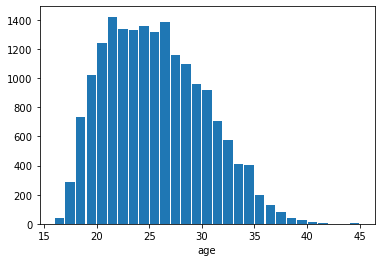

In [137]:
plt.hist(data=df,x='age',bins=29, rwidth=.9)
plt.xlabel("age")

Text(0.5, 0, 'overall')

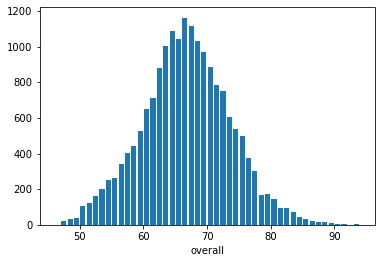

In [138]:
plt.hist(data=df,x='overall',bins=48, rwidth=.8)
plt.xlabel("overall")

Text(0.5, 0, 'potential')

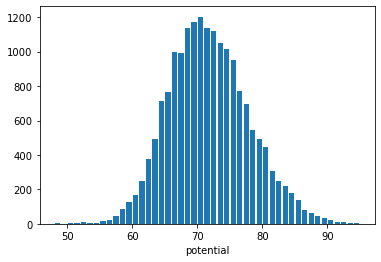

In [139]:
plt.hist(data=df,x='potential',bins=47, rwidth=.8)
plt.xlabel("potential")

Text(0.5, 0, 'value')

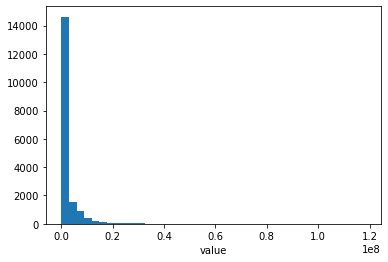

In [140]:
plt.hist(data=df,x='value',bins=40, rwidth=1)
plt.xlabel("value")

Text(0.5, 0, 'wage')

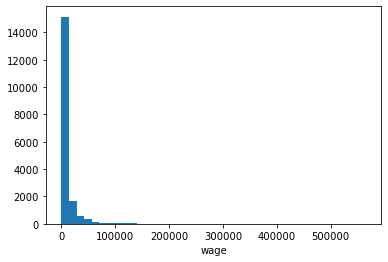

In [141]:
plt.hist(data=df,x='wage',bins=40, rwidth=1)
plt.xlabel("wage")

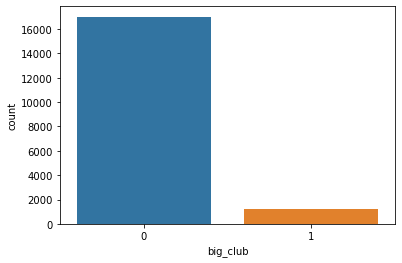

In [142]:
sns.countplot(df['big_club'])

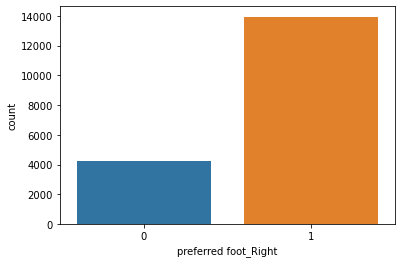

In [143]:
sns.countplot(df['preferred foot_Right'])

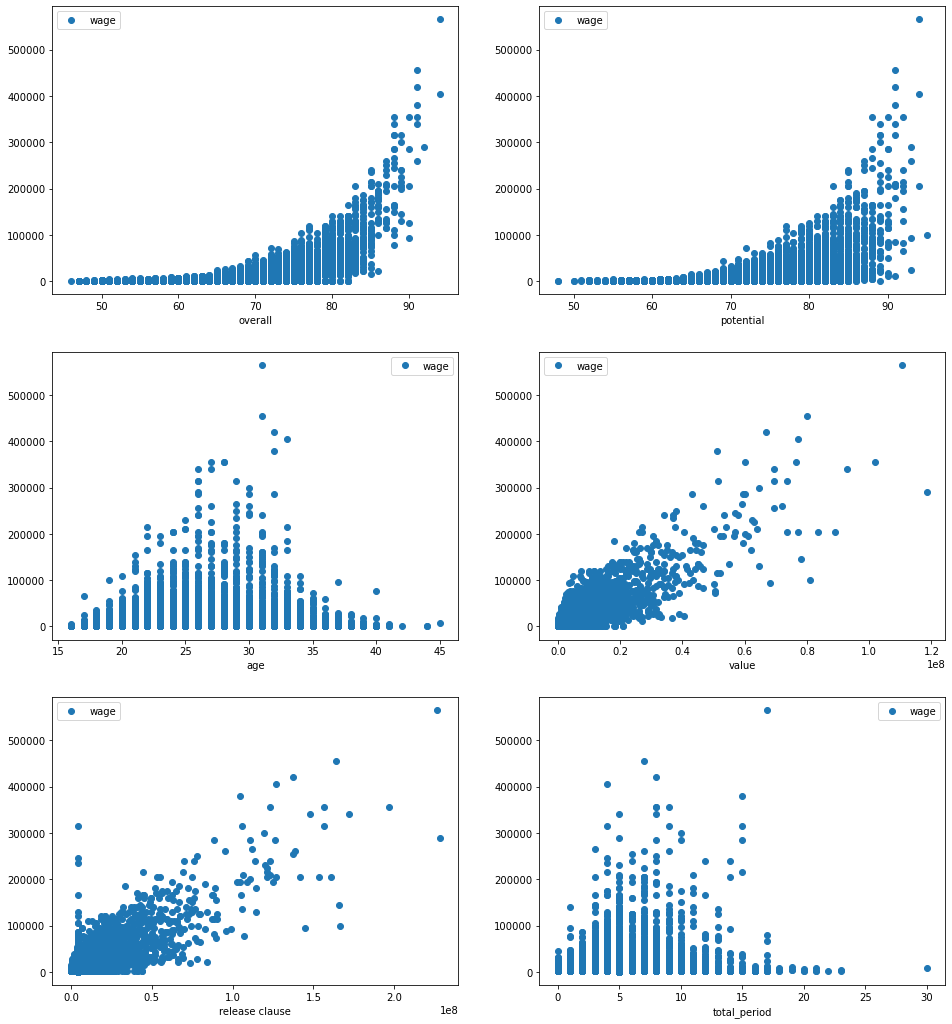

In [144]:
nrows=3 
ncols=2
fig, axes = plt.subplots(nrows, ncols, figsize = (ncols * 8, nrows*6))
df.plot(ax=axes[0,0], x='overall', y='wage', style='o')
df.plot(ax=axes[0,1], x='potential', y='wage', style='o')
df.plot(ax=axes[1,0], x='age', y='wage', style='o')
df.plot(ax=axes[1,1], x='value', y='wage', style='o')
df.plot(ax=axes[2,0], x='release clause', y='wage', style='o')
df.plot(ax=axes[2,1], x='total_period', y='wage', style='o')

# importing the learning models 
- Linear regression
- Decision tree
- Random forest

### 1) Linear Regression model
###### using train-test split

i just want to mention that it took me a substantial amount of time to find a way to startify the target feature, finally i found this cool article on medium https://danilzherebtsov.medium.com/continuous-data-stratification-c121fc91964b explaining how to do it. but unfortunately i couldn't install the package due to some problem in the path of the installation. anyway the split made without stratifing is fairly balanced.

In [145]:
from sklearn.model_selection import train_test_split

X_full, y_full= df.iloc[:,:-1] ,df.iloc[:,-1]



X_train, X_test, y_train, y_test = train_test_split(X_full, y_full ,test_size=0.3, shuffle=True, 
                                         random_state=13)

X_val, X_test, y_val, y_test = train_test_split(X_test,y_test ,test_size=0.5, shuffle=True, 
                                           random_state=13)

In [146]:
y_train.mean()

9751.804770872568

In [147]:
y_test.mean()

9861.273792093703

In [148]:
y_val.mean()

9505.675576711827

##### not perfectly stratified but not bad

In [149]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [150]:
reg.intercept_

-20159.780640444103

0.7234369042275692
10052.705636138651


Text(0, 0.5, 'Residuals')

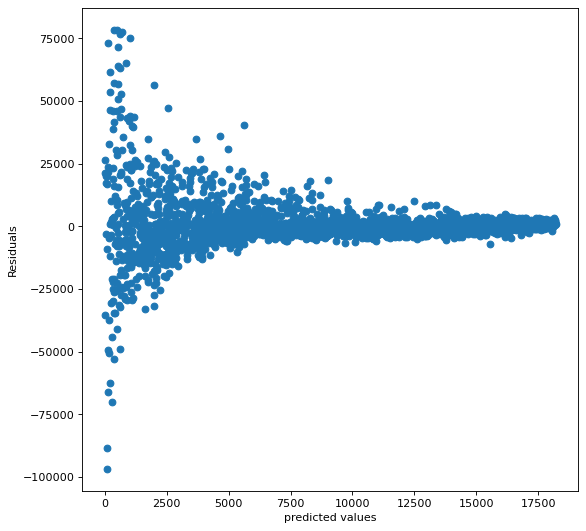

In [183]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = reg.predict(X_val)
print(reg.score(X_val, y_val))
print(mean_squared_error(y_val, y_pred, squared=False))

plt.figure(figsize=(8, 8), dpi=80)
# plt.scatter(y_val, y_pred)
plt.plot(y_val - y_pred,marker='o',linestyle='')
plt.xlabel("predicted values")
plt.ylabel("Residuals")

In [184]:
def plot_prediction(y, y_pred, figsize=(10,4)):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, r2 = {:,.2f}'.format(rmse, r2))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))

#### Linear regression

In [185]:
from sklearn import linear_model

alpha_values = [0.01, 0.1, 1, 10, 100, 1000]
max_iter_values = [1600, 3200, 6400]

best_scores = []
different_parameters = []
for i in alpha_values:
    for j in max_iter_values:
        reg = linear_model.Lasso(random_state=13, alpha=i, max_iter=j)
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred)) 
        best_scores.append(rmse)
        different_parameters.append(str(i) + ", " + str(j))
print(best_scores)  

[9214.225172953918, 9214.225172953918, 9214.225172953918, 9214.225853626564, 9214.225853626564, 9214.225853626564, 9214.237350897922, 9214.237350897922, 9214.237350897922, 9214.821206816885, 9214.821206816885, 9214.821206816885, 9243.562845757206, 9243.562845757206, 9243.562845757206, 10052.705636138651, 10052.705636138651, 10052.705636138651]


Text(0, 0.5, 'RMSE')

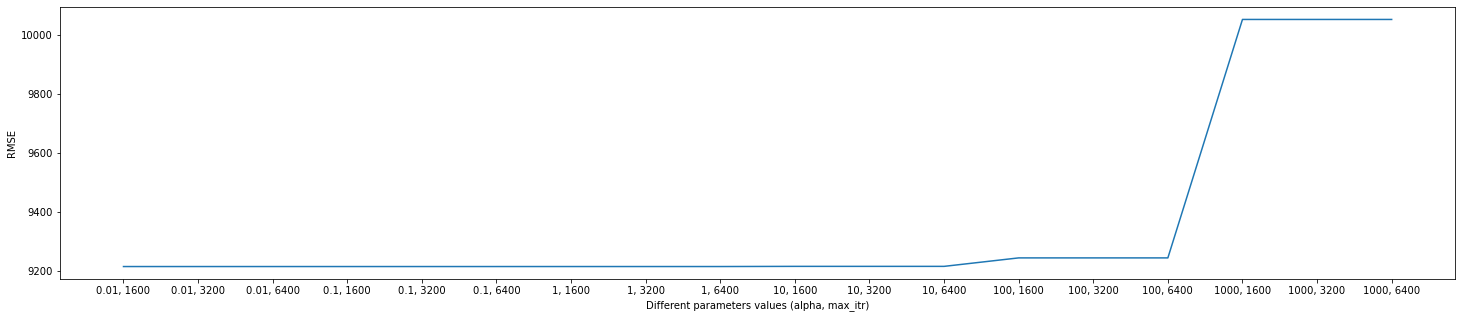

In [186]:
plt.figure(figsize=(25,5))
plt.plot(different_parameters, best_scores)
plt.xlabel("Different parameters values (alpha, max_itr)")
plt.ylabel("RMSE")

we pick the lowest RMSE parameters (0.01 , 1600)

0.7234369042275692
10052.705636138651


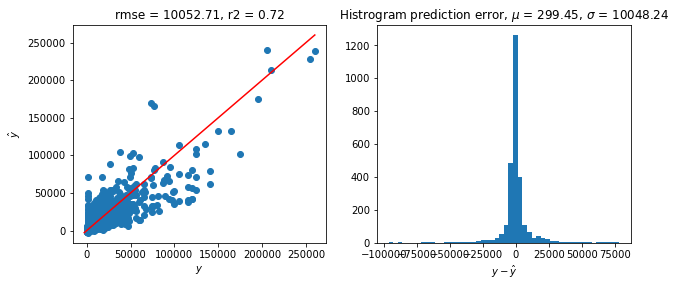

In [187]:
lasso = linear_model.Lasso(random_state=13, alpha=0.01, max_iter=1600)
y_pred = reg.predict(X_val)
print(reg.score(X_val, y_val))
print(mean_squared_error(y_val, y_pred, squared=False))
plot_prediction(y_val, y_pred)

#### decision tree

In [188]:
from sklearn.tree import DecisionTreeRegressor
depth_values = range(1, 25)

best_scores = []
different_parameters = []
for i in depth_values:
    reg_2 = DecisionTreeRegressor(max_depth=i, random_state=13)
    reg_2.fit(X_train, y_train)
    y_pred = reg_2.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred)) 
    best_scores.append(rmse)
    different_parameters.append(str(i))

Text(0, 0.5, 'RMSE')

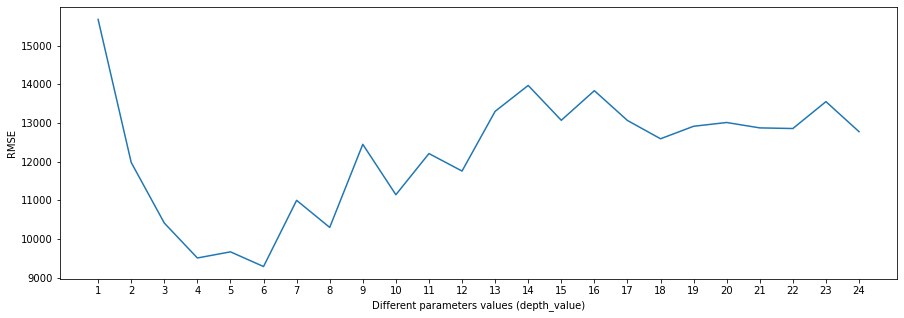

In [189]:
plt.figure(figsize=(15,5))
plt.plot(different_parameters, best_scores)
plt.xlabel("Different parameters values (depth_value)")
plt.ylabel("RMSE")

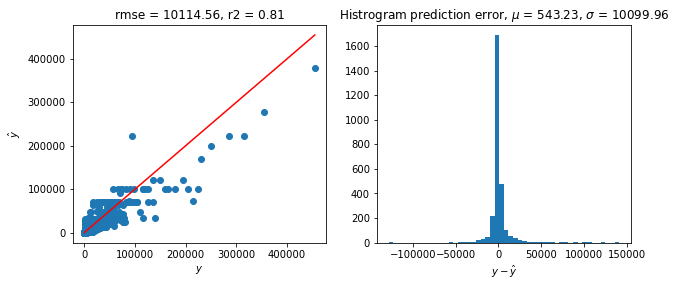

In [190]:
reg_tree = DecisionTreeRegressor(max_depth=6, random_state=13)
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)
plot_prediction(y_test,y_pred)

#### Random Forest

In [196]:
from sklearn.ensemble import RandomForestRegressor
estimators = range(50, 80)

best_scores = []
different_parameters = []
for i in estimators:
    reg_forest = RandomForestRegressor(n_estimators=i, random_state=13)
    reg_forest.fit(X_train, y_train)
    y_pred = reg_forest.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred)) 
    best_scores.append(rmse)
    different_parameters.append(str(i))


Text(0, 0.5, 'RMSE')

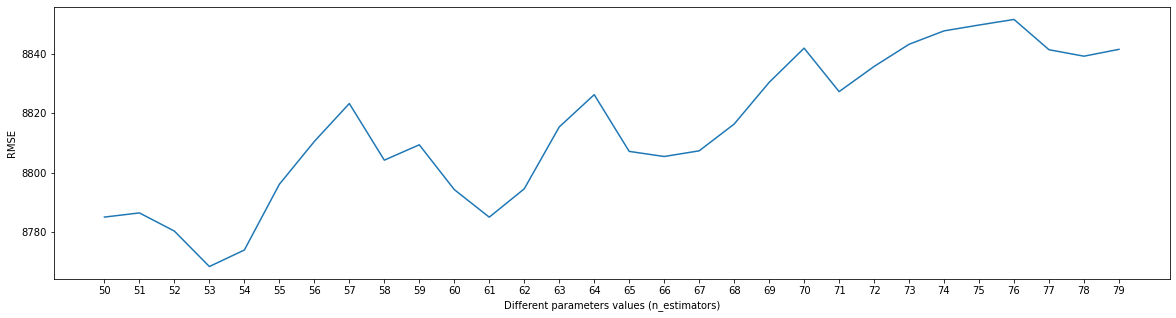

In [198]:
plt.figure(figsize=(20,5))
plt.plot(different_parameters, best_scores)
plt.xlabel("Different parameters values (n_estimators)")
plt.ylabel("RMSE")

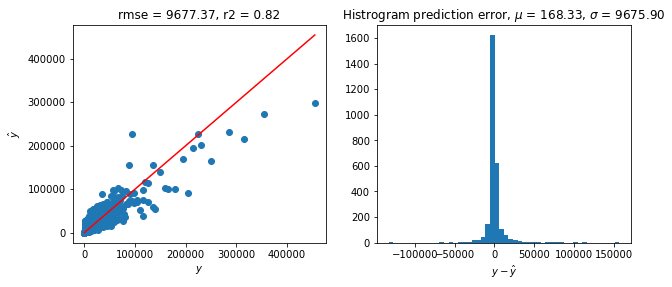

In [199]:
reg_forest = RandomForestRegressor(n_estimators=53, random_state=13)
reg_forest.fit(X_train, y_train)
y_pred = reg_forest.predict(X_test)
plot_prediction(y_test,y_pred)